In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data Prep : Load, Clean, Format

In [2]:
url="https://raw.githubusercontent.com/pplonski/datasets-for-start/master/employee_attrition/HR-Employee-Attrition-All.csv"
df=pd.read_csv(url)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Empty value count

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# View some statistic

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Get count of the number of employee attrition

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\WindowsX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


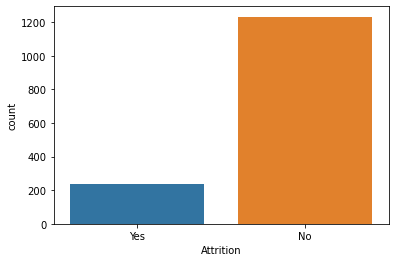

In [7]:
# Visualize

sns.countplot(df['Attrition']);

In [8]:
# Clean uniform value

df = df.drop('Over18', axis=1)
df = df.drop('EmployeeNumber', axis=1)
df = df.drop('StandardHours', axis=1)
df = df.drop('EmployeeCount', axis=1)

In [9]:
# replace Yes and No in Attrition with 1 and 0.

Num_val = {'Yes':1, 'No':0}
df['Attrition'] = df["Attrition"].apply(lambda x: Num_val[x])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [10]:
# Replace categorical data with dummy values

df1 = pd.get_dummies(df)
df1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [11]:
df_num = df[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel',
                       'JobSatisfaction', 
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear']].copy()

In [12]:
df_final = pd.concat([df_num, df1], axis=1)
df_final

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,94,3,2,4,1,0,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,3,61,2,2,2,4,1,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,4,92,2,1,3,2,0,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,56,3,1,3,3,0,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,40,3,1,2,4,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,3,41,4,2,4,3,1,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,4,42,2,3,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,2,87,4,2,2,2,1,...,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,4,63,2,2,2,4,0,...,0,0,0,1,0,0,1,0,1,0


### Unique Value

In [13]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('______________________________________________________________________')

BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
______________________________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
______________________________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
______________________________________________________________________
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_______________________________________________________________

# Modelling & Analysis

### Attrition Rate by Gender

In [14]:
df.groupby(['Gender','Attrition']).agg({'Attrition': ['count']})

Attrition
                     count
Gender Attrition          
Female 0               501
       1                87
Male   0               732
       1               150

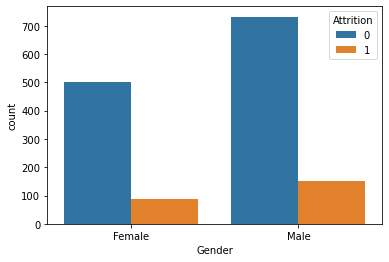

In [15]:
sns.countplot(x = "Gender",data=df, hue='Attrition')
plt.show()

In [16]:
df.groupby('Gender').Attrition.mean()

Gender
Female    0.147959
Male      0.170068
Name: Attrition, dtype: float64

Male employees tend to have a higher attrition rate than female employees.

### Attrition Rate by Department

In [17]:
df.groupby(['Department','Attrition']).agg({'Attrition': ['count']})

Attrition
                                     count
Department             Attrition          
Human Resources        0                51
                       1                12
Research & Development 0               828
                       1               133
Sales                  0               354
                       1                92

In [18]:
Dep = df.groupby('Department')['Attrition'].mean()
Dep

Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64

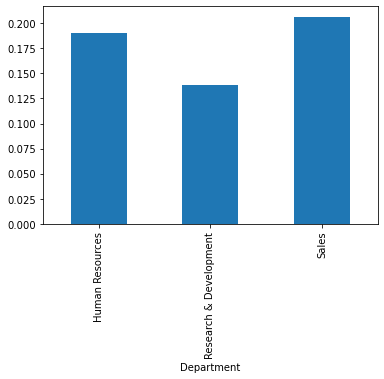

In [19]:
Dep.plot(kind='bar');

Sales dept has the highest attrition rate followed by Human Resources and Research&Development

### JobRole and MonthlyIncome

C:\Users\WindowsX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


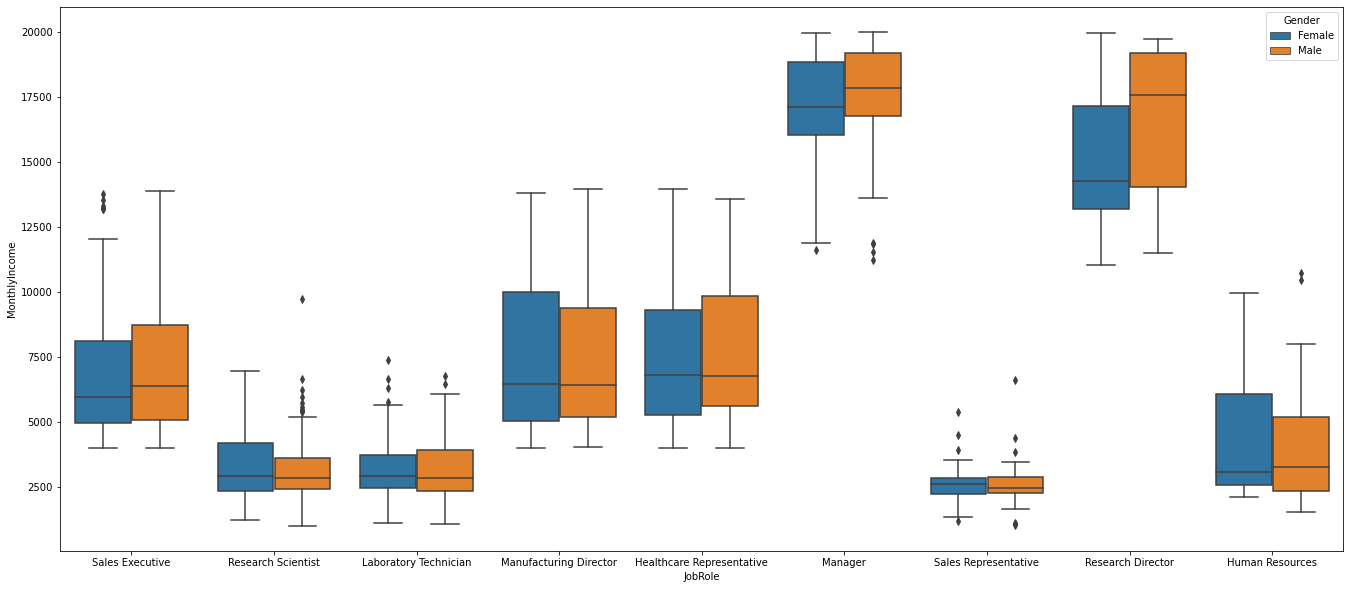

In [20]:
plt.figure(figsize=(23,10))
sns.boxplot('JobRole', 'MonthlyIncome', hue = 'Gender',data = df);

### Attrition Rate by Education Field

In [21]:
ef = df.groupby('EducationField').Attrition.mean()
ef

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
Name: Attrition, dtype: float64

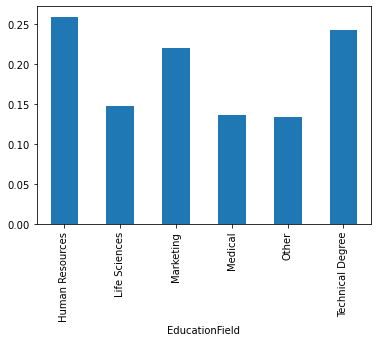

In [22]:
ef.plot(kind='bar');

### Attrition Rate by BusinessTravel Type

In [23]:
df.groupby(['BusinessTravel','Attrition']).agg({'Attrition': ['count']})

Attrition
                                count
BusinessTravel    Attrition          
Non-Travel        0               138
                  1                12
Travel_Frequently 0               208
                  1                69
Travel_Rarely     0               887
                  1               156

In [24]:
bt = df.groupby('BusinessTravel')['Attrition'].mean()
bt

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
Name: Attrition, dtype: float64

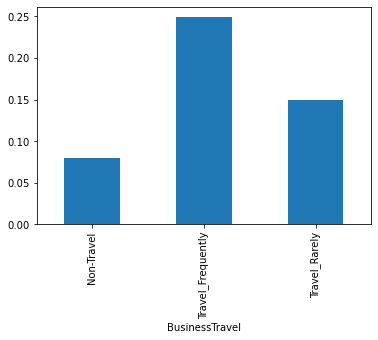

In [25]:
bt.plot(kind='bar');

### Attrition Rate by JobInvolvement, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance, EnvironmentSatisfaction

1 = Low

2 = Medium

3 = High

4 = Very High

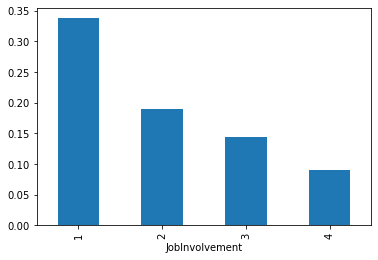

In [26]:
ji = df.groupby('JobInvolvement')['Attrition'].mean()
ji.plot(kind='bar');

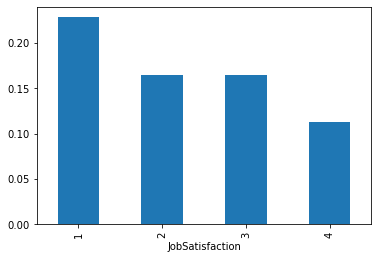

In [27]:
js = df.groupby('JobSatisfaction')['Attrition'].mean()
js.plot(kind='bar');

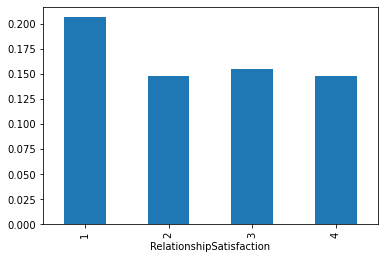

In [28]:
rs = df.groupby('RelationshipSatisfaction')['Attrition'].mean()
rs.plot(kind='bar');

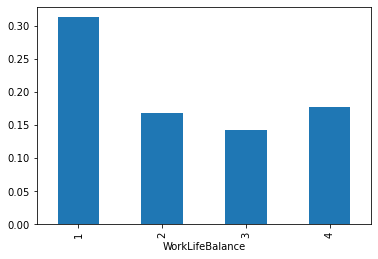

In [29]:
wl = df.groupby('WorkLifeBalance')['Attrition'].mean()
wl.plot(kind='bar');

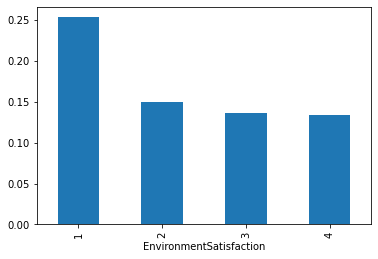

In [30]:
es = df.groupby('EnvironmentSatisfaction')['Attrition'].mean()
es.plot(kind='bar');

### Attrition Rate by Job Level and Job Role

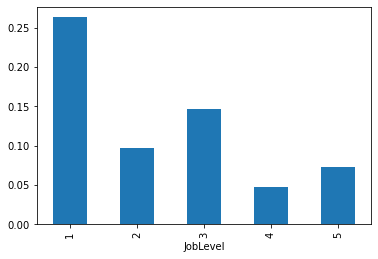

In [31]:
jl = df.groupby('JobLevel')['Attrition'].mean()
jl.plot(kind='bar');

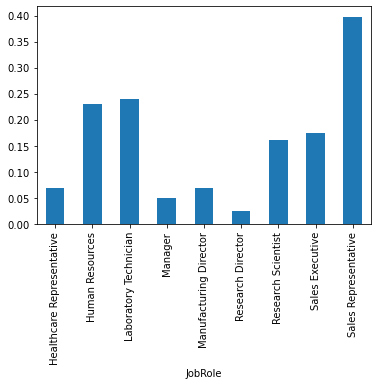

In [32]:
jr = df.groupby('JobRole')['Attrition'].mean()
jr.plot(kind='bar');

### Attrition Rate by Distance From Home

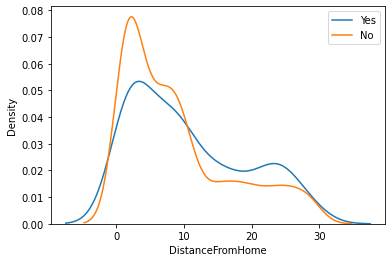

In [33]:
Attrition_Y = df[df['Attrition']==True]
Attrition_N = df[df['Attrition']==False]
sns.kdeplot(Attrition_Y.DistanceFromHome)
sns.kdeplot(Attrition_N.DistanceFromHome)
plt.legend(('Yes', 'No'));

The farther the distance from your home to your place of work, the higher the attrition rate will be

In [34]:
df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition,0,1
JobRole,,
Healthcare Representative,9.204918,17.666667
Human Resources,6.600000,13.416667
Laboratory Technician,9.329949,9.661290
Manager,7.927835,10.000000
Manufacturing Director,9.533333,8.800000
Research Director,8.474359,7.000000
Research Scientist,8.869388,9.765957
Sales Executive,9.026022,12.649123
Sales Representative,9.000000,8.151515


### Attrition Rate by Monthly Income

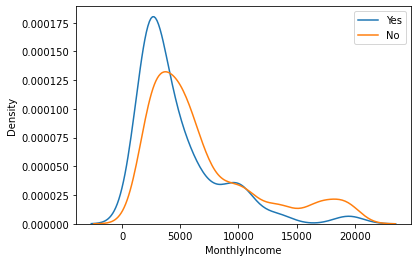

In [35]:
sns.kdeplot(Attrition_Y.MonthlyIncome)
sns.kdeplot(Attrition_N.MonthlyIncome)
plt.legend(('Yes', 'No'));

Attrition rate decreases as monthly income increases

# 

### Correlation Heatmap

In [36]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


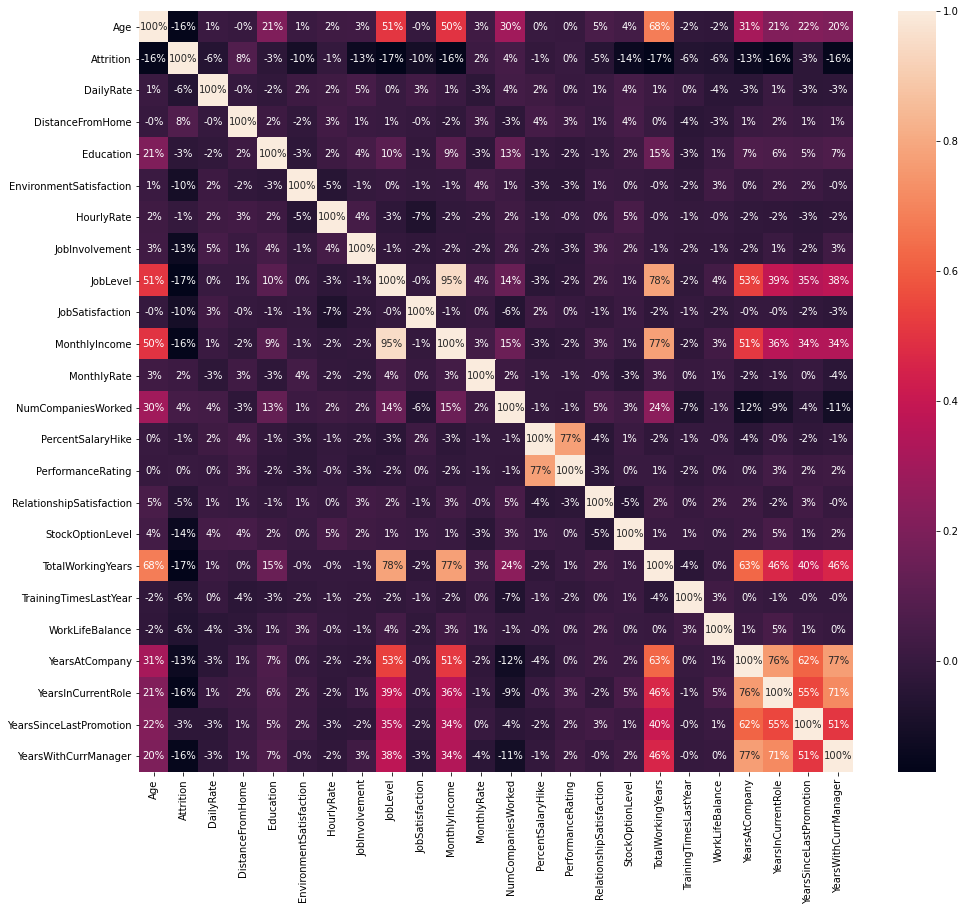

In [37]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%');

This heatmap shows the relationship between one variable and another. The greater the percentage value indicates that the two variables influence each other.

### Modelling Data 

In [38]:
target = df_final['Attrition']
features = df_final.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=10)

#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
accuracy_score(y_test, test_pred)

0.8367346938775511

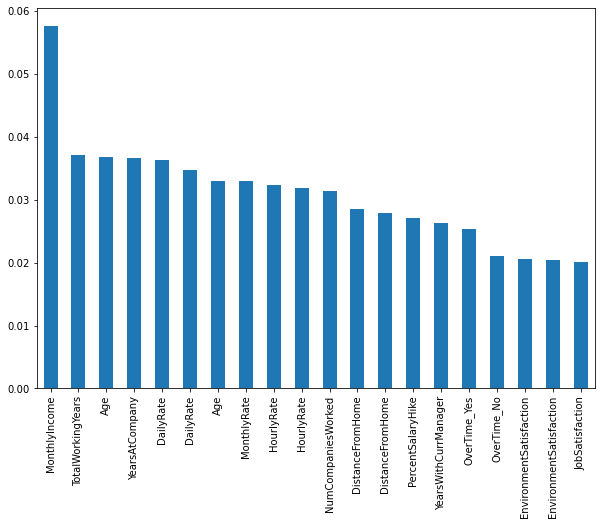

In [39]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='bar', figsize=(10,7));

Monthly income has the greatest influence on the attrition rate

# Summary

## Attrition Rate most influential factors

### a. Age

Based on the data, employees with a young age tend to have a higher attrition rate than employees with an older age. This is possible due to several factors, such as continuing your studies, or choosing a better place to work.

### b. Life satisfaction, work load, and mental state

The environmental conditions in which a person works have a considerable influence on the employee's attrition rate. An uncomfortable work environment can be caused by a lack of office facilities, coworkers who are less supportive or can be called toxic. This condition affects a person's work motivation and of course has an impact on his mental health.

### c. Home to work distance

Based on the graph of the effect of the distance between the office and the place of residence, it shows that the farther a person has to travel, employees, the higher the attrition rate. The longer the distance, the longer the time required for transport and the more transportation costs will be incurred
must be issued every month.

### d. Monthly income

Based on the data, employees with lower income tend to leave the company more easily. This is natural, because employees tend to look for jobs with almost the same load but with a higher salary.

### e. Work hour

Excessive working hours can cause various problems, including problems with physical and mental health, lack of productivity, and increased attrition rate.